In [27]:
import pandas as pd
import numpy as np

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
Tshirt = pd.read_csv("Tshirt_Sizing_Dataset.csv")

In [30]:
Tshirt.head(3)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S


In [31]:
Tshirt.tail(3)

,Height (in cms),Weight (in kgs),T Shirt Size
15,170,63,L
16,170,64,L
17,170,68,L


In [32]:
x = Tshirt.iloc[:, :2].values

In [33]:
x.shape

(18, 2)

In [34]:
y = Tshirt.iloc[:,2].values

In [35]:
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [37]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=5)


In [39]:
X_train

array([[170,  68],
       [168,  62],
       [160,  64],
       [160,  60],
       [163,  64],
       [165,  61],
       [158,  58],
       [170,  64],
       [163,  61],
       [168,  63],
       [170,  63],
       [168,  66],
       [160,  59]])

In [40]:
X_train.size

26

In [41]:
X_train.shape

(13, 2)

In [42]:
y_test.shape

(5,)

In [43]:
X_test.shape

(5, 2)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p= 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred = classifier.predict(X_test)


In [46]:
y_pred

array([1, 1, 0, 1, 0])

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

<Axes: >

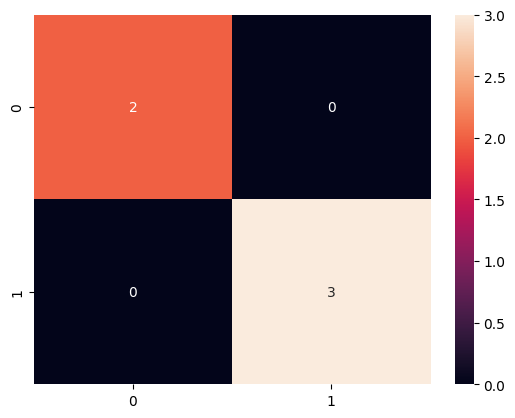

In [48]:
sns.heatmap(cm, annot=True)

VISUALIZATION

(58.0, 65.98999999999842)

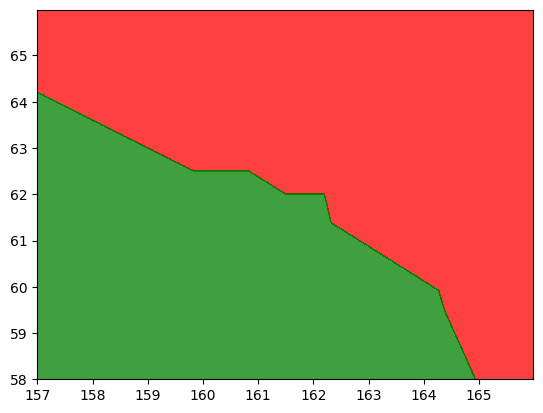

In [52]:
from matplotlib.colors import ListedColormap

X_grid, Y_grid = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_grid[:,0].min() - 1 , stop = X_grid[:,0].max() + 1 , step = 0.01),
                     np.arange(start = X_grid[:,1].min() - 1 , stop = X_grid[:,1].max() + 1 , step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


